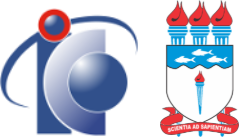

> ## **UNIVERSIDADE FEDERAL DE ALAGOAS - UFAL**
> ### **INSTITUTO DE COMPUTAÇÃO - IC**
> #### Nome: **Karla Sophia Santana da Cruz**&emsp;&nbsp; **|**&emsp;&emsp; Matrícula: **19111113**
> #### Curso: **Engenharia de Computação** &emsp;&emsp; **|** &emsp;&emsp;Período: **2023.1**

> # **Redes Neurais e Aprendizado Profundo - Tiago Vieira**
> # **PROJECT 1**




### Requirements

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
plt.style.use('ggplot')

## **Pre-processing and visualization**

### **1. Visualize dataset's statistics (histograms, boxplot to evaluate outliers, missing values, etc).**

In [88]:
df = pd.read_csv("diabetes.csv")

In [89]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Realizando os gráficos de Histograma e Boxplot para analisar como os dados brutos estão se comportanto, pode-se observar em algumas colunas valores iguais a 0 que não deveriam existir, como também valores discrepantes, como no caso da coluna "insulin". Além disso, o gráfico de correlação mostra informações importantes sobre a relação entre saída e *feature*, notando uma conexão forte entre a coluna "outcome" e "glucose", o que faz sentido por se tratar da Diabetes.

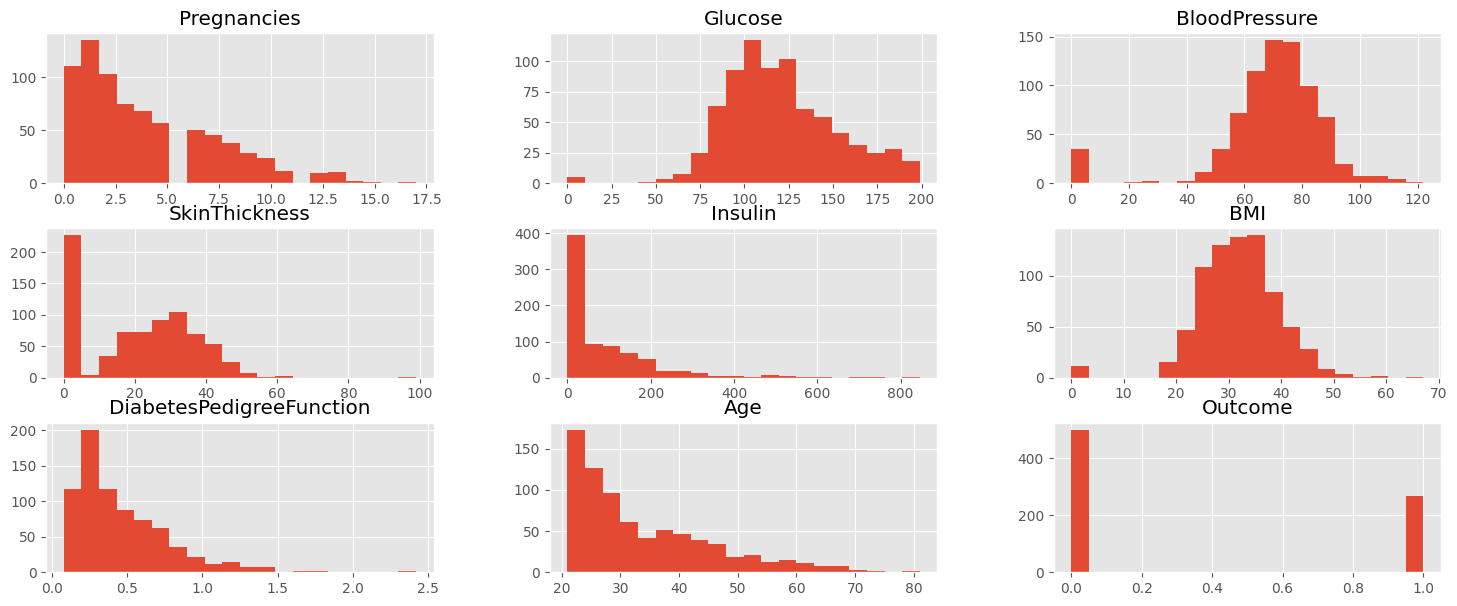

In [90]:
df.hist(bins=20, figsize=(18, 7))
plt.show()

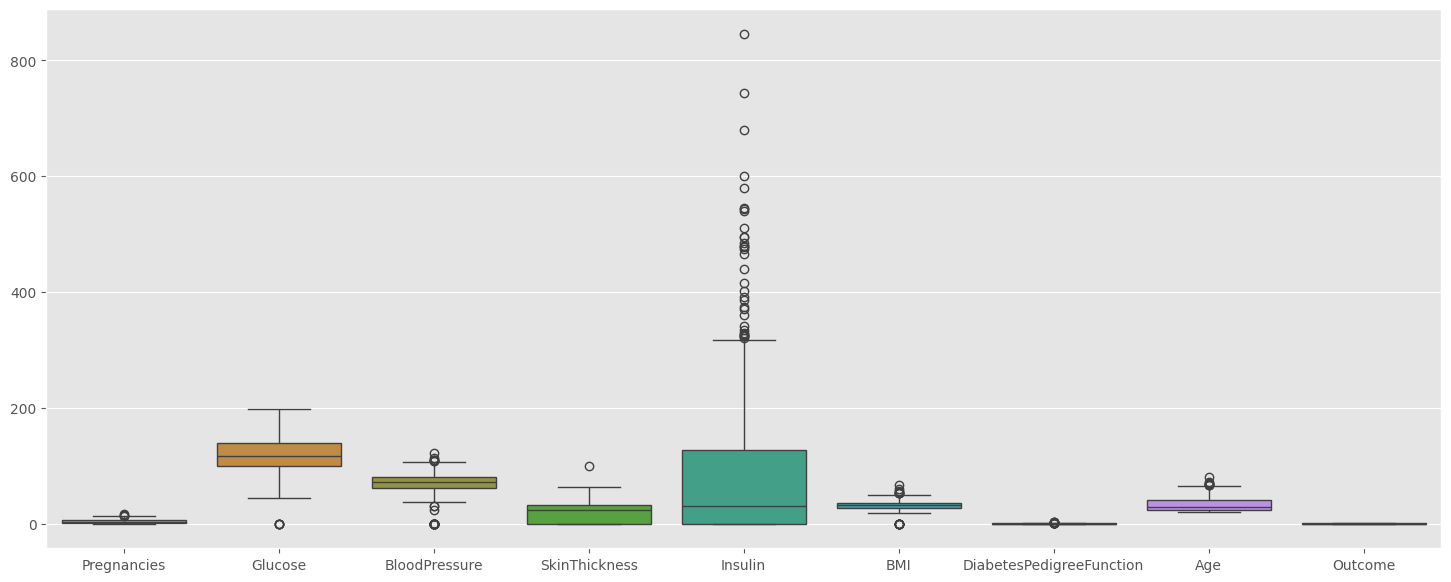

In [91]:
plt.figure(figsize=(18, 7))
sns.boxplot(data=df)
plt.show()

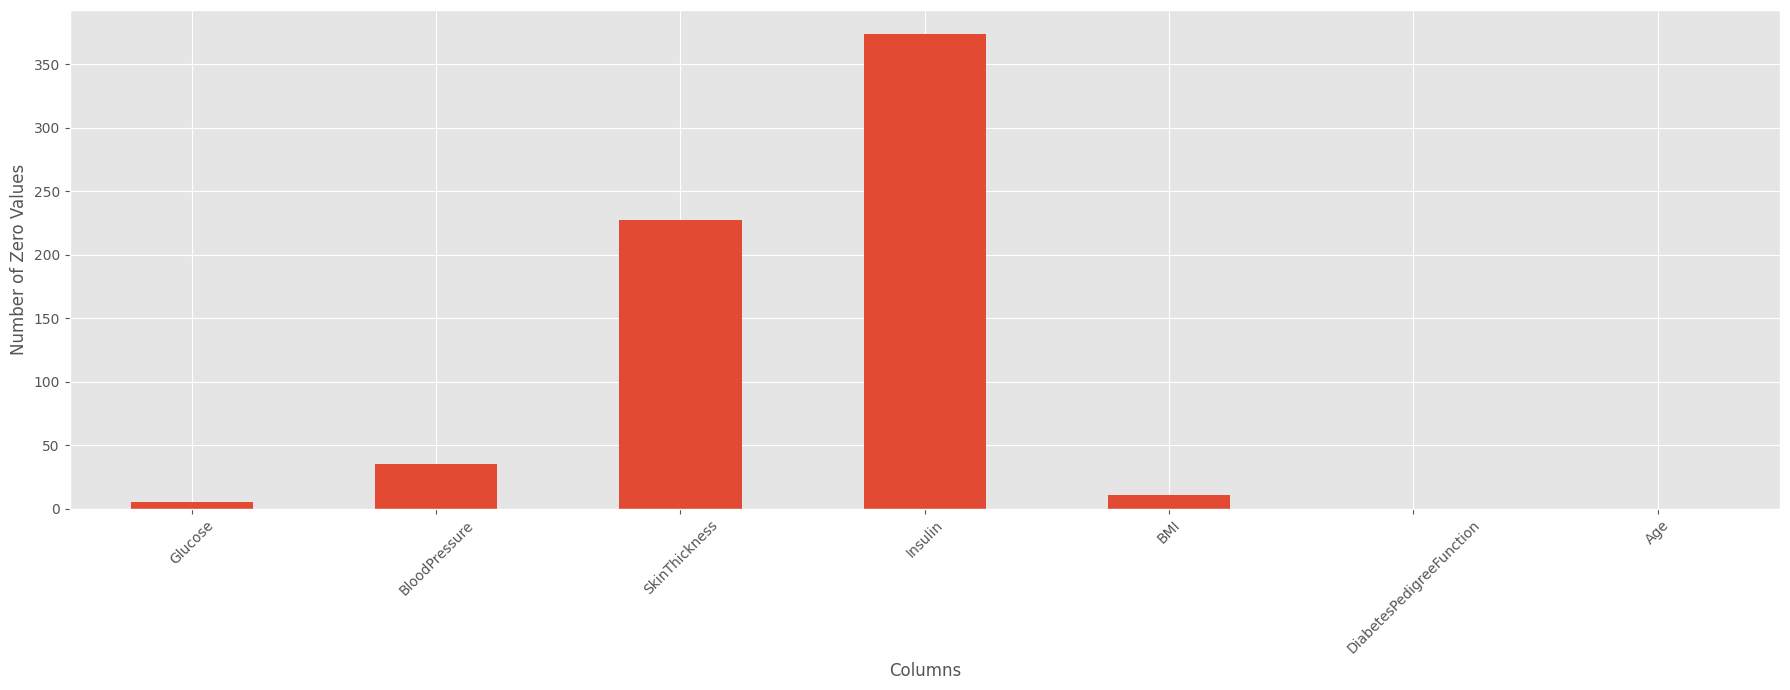

In [92]:
zero_values = (df.iloc[:, 1:-1] == 0).sum()

plt.figure(figsize=(18, 7))
zero_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Zero Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

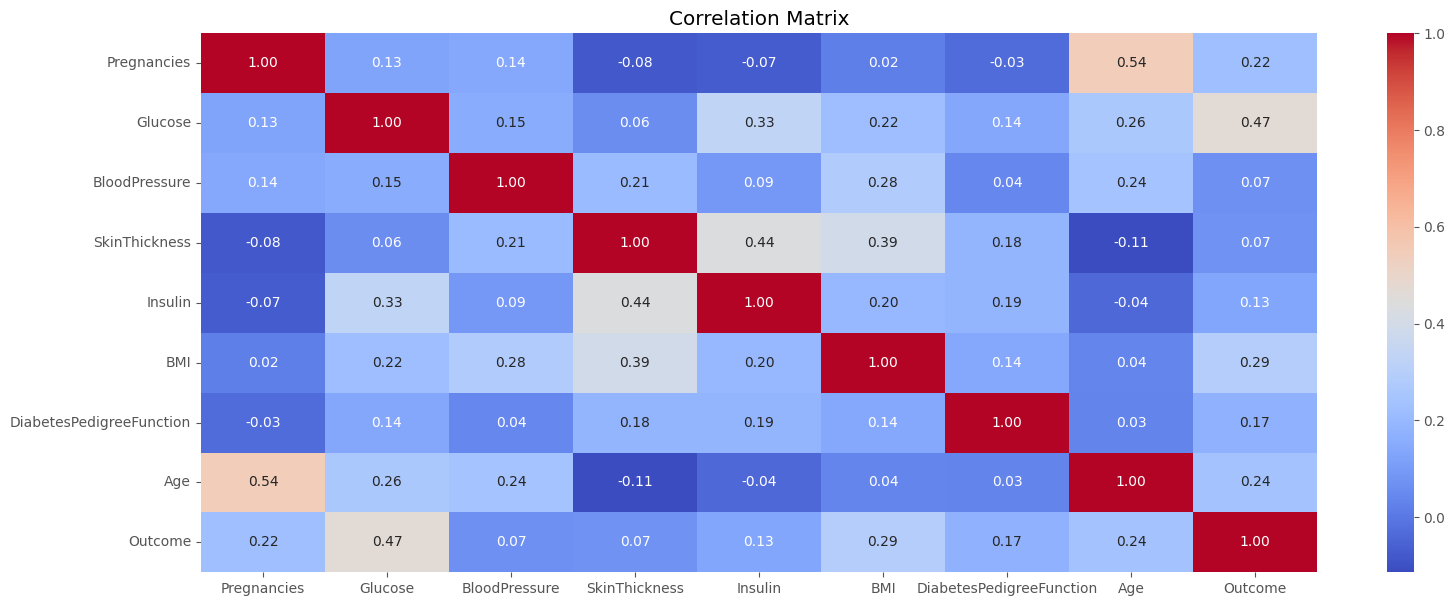

In [93]:
correlation_matrix = df.corr()

plt.figure(figsize=(18, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Outro destaque importante é a quantidade de valores nulos, o qual não possui.

In [94]:
missing_values = df.isnull().sum()

print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### **2. Apply an adequate feature pre-processing.**

#### Para melhorar a qualidade desses dados, uma abordagem que pode e será usada é a de remoção dos outliers.

In [95]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

df = df[~outliers]

#### Além disso, em relação aos valores iguais a 0 restantes, uma abordagem possível seria a de removê-los. Porém, devido a alta quantidade de linhas (perto de 400 linhas), o dataset seria cortado para mais da metade, de modo a não ser uma boa prática para essa aplicação.

In [96]:
# cols_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# for col in cols_to_replace_zero:
#     df[col] = df[col].replace(0, np.nan)

# df.dropna(inplace=True)

#### Outra abordagem é a de preencher esses valores com a média da coluna. Muito usada, essa abordagem trouxe uma boa acurácia para o modelo, sendo porém um pouco menor do que a atual, de modo que ela não foi usada nessa aplicação.

In [97]:
# cols_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# for col in cols_to_replace_zero:
#     df[col] = df[col].replace(0, np.nan)

# df.fillna(df.mean(), inplace=True)

#### Por fim, uma das principais abordagens de pré-processamento que deve ser realizada é a de normalização de dados. Foram testados alguns modelos, porém o que deu uma melhor acurácia foi o `StandardScaler()`.

In [98]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [99]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Train a first classifier**

### **Use SciKit-Learn Logistic Regression classifier**

In [100]:
clr = LogisticRegression(max_iter = 1000, solver = 'liblinear')

### **Split the dataset into 80% (for training) and 20% for testing**

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Use 10 fold cross validation method**

In [102]:
cross_val_scores = cross_val_score(clr, X_train, y_train, cv=10)

In [103]:
clr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

### Avaliando os resultados obtidos com o classificador de Regressão Linear:

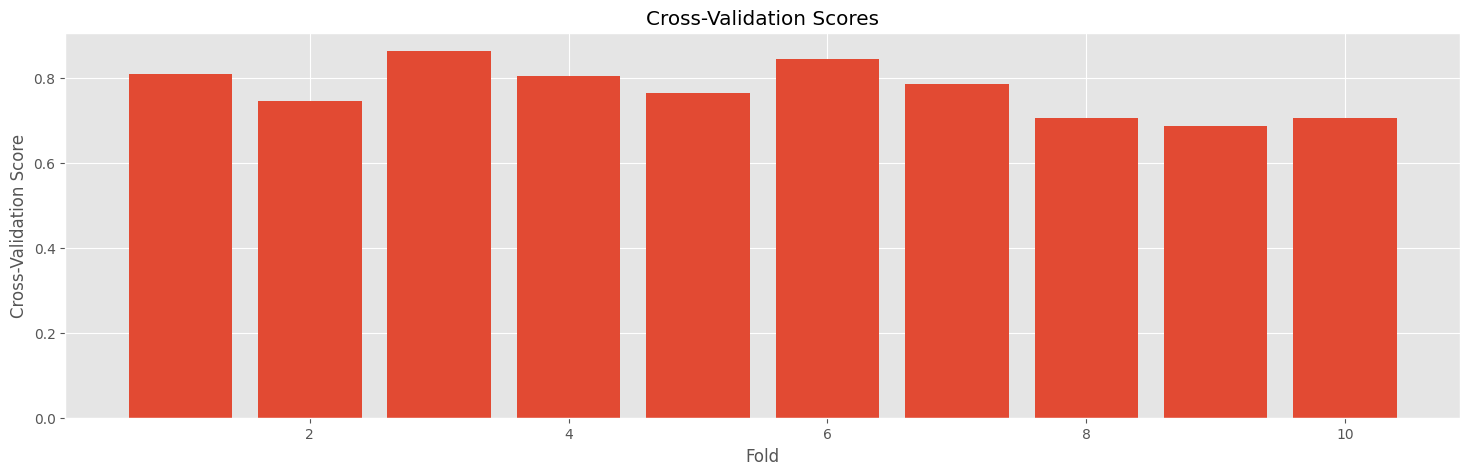

In [104]:
plt.figure(figsize=(18, 5))
plt.bar(range(1, len(cross_val_scores) + 1), cross_val_scores)
plt.xlabel('Fold')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores')
plt.show()

In [105]:
test_accuracy = clr.score(X_test, y_test)

In [106]:
print("Mean Cross-Validation Score:", round(np.mean(cross_val_scores) * 100, 2), "%")
print("\nTest Accuracy:", round(test_accuracy  * 100, 2), "%")

Mean Cross-Validation Score: 77.1 %

Test Accuracy: 82.03 %


#### Assim, vê-se que a Regressão Logistíca do SciKit-Learn obteve um Score Médio de 77% e Acurácia do conjunto de teste de 82%.

## **Train a second classifier**

### **Use Neural Networks with Tensorflow with a Logistic Regression mindset**

#### Sabendo que a regressão logística é um modelo linear simples, que possui somente uma camada, com função de ativação Sigmoide, foi usado esse conceito para criação do modelo com NN.

In [107]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation='sigmoid', input_dim = X_train.shape[1])])

### **Provide training and testing performance curves throughout epochs**

In [108]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

history = model.fit(X_train, y_train, epochs = 100, batch_size = 8, validation_data = (X_test, y_test), callbacks = [early_stopping], verbose = 2)

Epoch 1/100
64/64 - 0s - loss: 0.6408 - accuracy: 0.6399 - val_loss: 0.6396 - val_accuracy: 0.6641 - 416ms/epoch - 6ms/step
Epoch 2/100


64/64 - 0s - loss: 0.6115 - accuracy: 0.6908 - val_loss: 0.6069 - val_accuracy: 0.7031 - 87ms/epoch - 1ms/step
Epoch 3/100
64/64 - 0s - loss: 0.5880 - accuracy: 0.7241 - val_loss: 0.5799 - val_accuracy: 0.7188 - 78ms/epoch - 1ms/step
Epoch 4/100
64/64 - 0s - loss: 0.5687 - accuracy: 0.7260 - val_loss: 0.5586 - val_accuracy: 0.7266 - 69ms/epoch - 1ms/step
Epoch 5/100
64/64 - 0s - loss: 0.5527 - accuracy: 0.7358 - val_loss: 0.5420 - val_accuracy: 0.7422 - 71ms/epoch - 1ms/step
Epoch 6/100
64/64 - 0s - loss: 0.5396 - accuracy: 0.7515 - val_loss: 0.5254 - val_accuracy: 0.7344 - 72ms/epoch - 1ms/step
Epoch 7/100
64/64 - 0s - loss: 0.5284 - accuracy: 0.7652 - val_loss: 0.5124 - val_accuracy: 0.7578 - 67ms/epoch - 1ms/step
Epoch 8/100
64/64 - 0s - loss: 0.5190 - accuracy: 0.7632 - val_loss: 0.5021 - val_accuracy: 0.7734 - 70ms/epoch - 1ms/step
Epoch 9/100
64/64 - 0s - loss: 0.5111 - accuracy: 0.7671 - val_loss: 0.4919 - val_accuracy: 0.7812 - 72ms/epoch - 1ms/step
Epoch 10/100
64/64 - 0s - lo

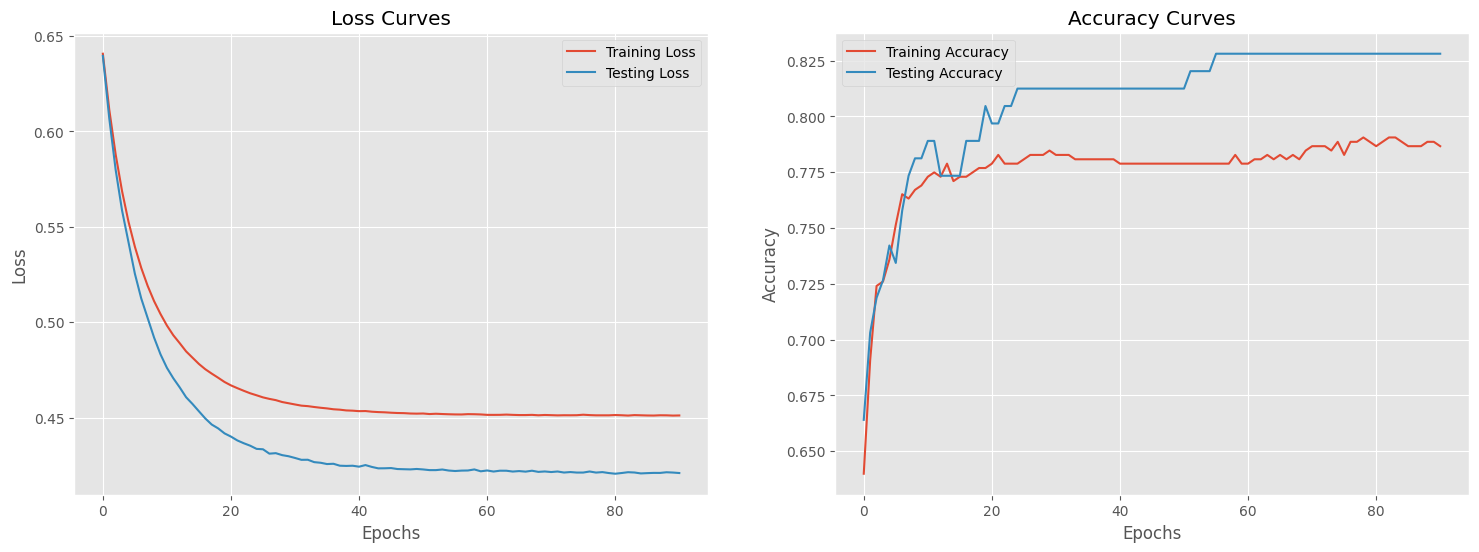

In [109]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()

### Avaliando o modelo

In [110]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

4/4 [==============================] - 0s 1ms/step


### **Provide the confusion matrix**

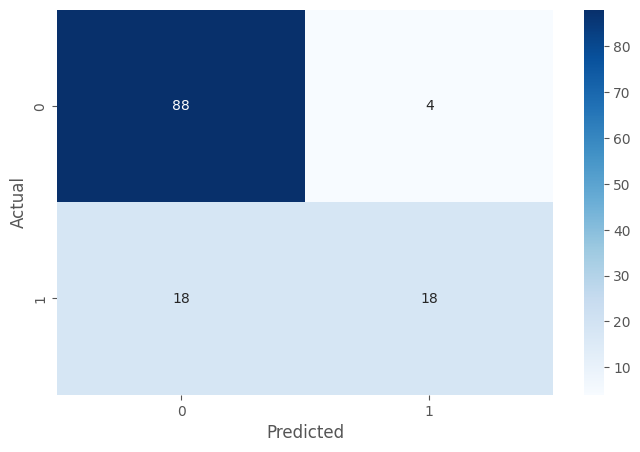

In [111]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Provide the ROC curve**

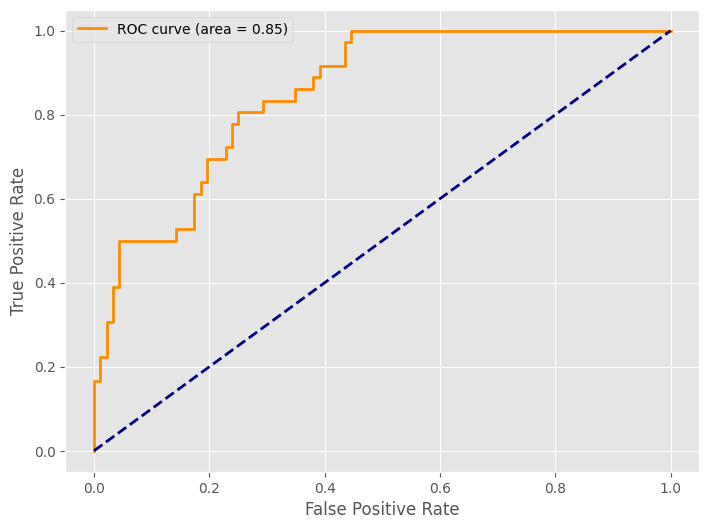

In [112]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### **Minimum classification accuracy of 75%**

In [113]:
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
print(f"Classification Accuracy: {accuracy * 100:.2f}%\n")

if accuracy >= 0.75:
    print("Minimum classification accuracy of 75% is met.")
else:
    print("Minimum classification accuracy of 75% is not met.")


Classification Accuracy: 82.81%

Minimum classification accuracy of 75% is met.


#### Por fim, observa-se que a acurácia do Segundo Classificador foi de aproximadamente 82%, atingindo a acurácia mínima necessária para a aplicação.